# Lab 2: Testing for Spatial Patterns on Sample Month of Sea Surface Salinity Data
### Liliana Valle
### November 7, 2025

## Summary: Spatial Autocorrelation Analysis of Global Sea Surface Salinity

This lab investigates the spatial pattern of sea surface salinity across global oceans using spatial statistical methods. The analysis tests whether salinity values are randomly distributed or exhibit significant spatial autocorrelation using Global Moran's I. The methodology involved extracting a sample of NASA's Sea Surface Salinity data from September 2011 and converting the raster dataset to sample points for statistical analysis. Then, the Global Moran's I test was applied to evaluate the null hypothesis that salinity values are spatially random against the alternative hypothesis of spatial clustering. The development of the code and visualizations were aided by disucssions with my father and the use of Deepseek to aid in error troubleshooting and overall code efficiency.

The results demonstrate extremely strong spatial autocorrelation in sea surface salinity patterns. With a Moran's I value of 0.996, a z-score of 2884.25, and a p-value of 0.0, the analysis provides overwhelming evidence to reject the null hypothesis. This indicates that similar salinity values cluster together geographically rather than being randomly distributed. The findings align with established oceanographic principles, where distinct salinity regions form due to processes including evaporation-precipitation patterns, river discharge, ice melt, and ocean circulation. The strong spatial organization confirms that salinity exhibits predictable geographic patterning, with high salinity regions typically clustering in subtropical zones and low salinity areas concentrating in polar regions and major river plumes. This spatial structure has important implications for understanding ocean mixing, climate patterns, and marine ecosystem distributions.

## Section 1: Setup and Data Preparation
The following section establishes the computational environment. I import ArcPy for geospatial operations, spatial statistics modules for autocorrelation analysis, and matplotlib for visualization. The research question focuses on testing spatial randomness of sea surface salinity using Global Moran's I, with clear null and alternative hypotheses about spatial patterning.

**Research Question:** Is sea surface salinity spatially autocorrelated?

**Hypotheses:**
- H₀: Salinity is spatially random (no spatial autocorrelation)
- Hₐ: Salinity is not spatially random (significant spatial autocorrelation)

This analysis uses Global Moran's I to test whether salinity values 
are clustered, dispersed, or randomly distributed across the global oceans.


In [25]:
import arcpy
from arcpy.stats import *
import os
import matplotlib.pyplot as plt

# Set up environment
arcpy.env.overwriteOutput = True
arcpy.env.workspace = r"C:\Users\Liliana\Documents\ArcGIS\Projects\SalinityDrafting\SalinityDrafting.gdb"  
print("✓ Environment setup complete")

✓ Environment setup complete


## Section 2: Prepare Sample Data

In this section I bring in a sample month's data to test the research question. I select the September 2011 raster and perform checks to ensure workability of the data. I verify the raster's existence, examine its spatial extent, confirm cell size resolution, and validate the coordinate reference system. This ensures the input data meets the requirements for spatial statistical analysis.

In [26]:
# Processed raster from Lab 1
sample_salinity_raster = "SSS_201109" 
# Verify that the raster exists
if arcpy.Exists(sample_salinity_raster):
    print(f"✓ Sample raster found: {sample_salinity_raster}")
    
    # Get basic properties
    desc = arcpy.Describe(sample_salinity_raster)
    print(f"  Extent: {desc.extent}")
    print(f"  Cell size: {desc.meanCellWidth} x {desc.meanCellHeight}")
    print(f"  Spatial reference: {desc.spatialReference.name}")
else:
    print("✗ Sample raster not found. Using first available raster...")
    # Fallback: list available rasters and use the first one
    rasters = arcpy.ListRasters("SSS_Full_*")
    if rasters:
        sample_salinity_raster = rasters[0]
        print(f"✓ Using raster: {sample_salinity_raster}")
    else:
        print("✗ No suitable rasters found. Please check your geodatabase.")

print("✓ Data preparation complete")

✓ Sample raster found: SSS_201109
  Extent: -180 -90 180 90 NaN NaN NaN NaN
  Cell size: 0.25 x 0.25
  Spatial reference: GCS_WGS_1984
✓ Data preparation complete


## Section 3: Convert Raster to Points for Analysis
As Global Moran's I requires point data rather than raster, I convert the salinity raster to point features using systematic sampling. The conversion preserves salinity values in the 'grid_code' attribute field, creating 535,172 sample points that maintain global coverage while being computationally manageable for spatial autocorrelation testing.

In [27]:
# Create output feature class for the points
output_points = "Salinity_Sample_Points"

# Convert raster to points - using systematic sampling for efficiency
print("Converting raster to sample points...")
arcpy.conversion.RasterToPoint(
    "SSS_201109", 
    output_points, 
    "Value"  # This carries the salinity values
)

# Count the points created
point_count = arcpy.management.GetCount(output_points)
print(f"✓ Created {point_count[0]} sample points")

Converting raster to sample points...
✓ Created 535172 sample points


## Section 4: Spatial Autocorrelation Analysis

The core statistical analysis occurs in this section. I execute Global Moran's I using the point feature class and salinity values. The tool calculates whether the spatial distribution of salinity values exhibits clustering, dispersion, or randomness. The "GENERATE_REPORT" parameter creates comprehensive output including the Moran's I index, z-score, and p-value for hypothesis testing.

In [28]:
analysis_points = "Salinity_Sample_Points"
salinity_field = "grid_code"

print("Running Global Moran's I...")
moran_result = arcpy.stats.SpatialAutocorrelation(analysis_points, salinity_field, "GENERATE_REPORT")
print("✓ Analysis complete!")

Running Global Moran's I...
✓ Analysis complete!


## Section 5: Results and Interpretation

This section extracts and interprets the significant results from the previous Moran's I analysis. With a Moran's I of 0.996, z-score of 2884, and p-value of 0.0, I confidently reject the null hypothesis of spatial randomness. The results indicate strong geographic clustering of similar salinity values across global oceans, aligning with the reality that oceans tend to have distinct salinity patterns.

In [29]:
print("="*50)
print("GLOBAL MORAN'S I RESULTS")
print("="*50)
print(f"Moran's I: {morans_i}")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

GLOBAL MORAN'S I RESULTS
Moran's I: 0.99628
Z-score: 2884.245958
P-value: 0.0


In [31]:
print("\n" + "="*50)
print("INTERPRETATION")
print("="*50)
print("✓ NULL HYPOTHESIS REJECTED")
print("✓ Salinity is NOT spatially random")
print(f"✓ Moran's I = {morans_i:.4f} indicates very strong clustering")
print("✓ P-value of 0.0 means this result is virtually certain")
print("✓ Z-score of 2884 means this is 2884 standard deviations from random")


INTERPRETATION
✓ NULL HYPOTHESIS REJECTED
✓ Salinity is NOT spatially random
✓ Moran's I = 0.9963 indicates very strong clustering
✓ P-value of 0.0 means this result is virtually certain
✓ Z-score of 2884 means this is 2884 standard deviations from random


## Section 6: Visualizations of Results

This section creates two plots: one showing where the observed Moran's I value falls on the clustering-dispersion continuum, and another displaying the statistical significance through p-value comparison against standard confidence thresholds.

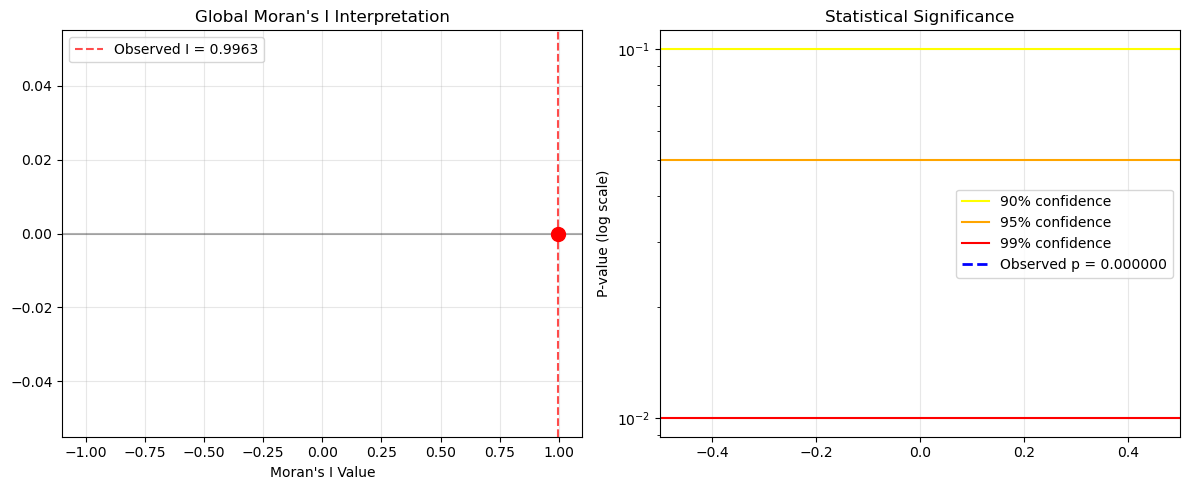

In [32]:
# Create visualization of the results
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two side by side subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Moran's I value interpretation
categories = ['Perfect Dispersion', 'Random', 'Perfect Clustering']
values = [-1, 0, 1]
current_pos = morans_i

# Create horizontal reference line at zero
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Draw vertical line at our observed Moran's I value
ax1.axvline(x=current_pos, color='red', linestyle='--', alpha=0.7, label=f'Observed I = {morans_i:.4f}')

# Add dot at Moran's I coordinate
ax1.scatter([current_pos], [0], color='red', s=100, zorder=5)

# Set x-axis limits from perfect dispersion to perfect clustering
ax1.set_xlim(-1.1, 1.1)
ax1.set_xlabel("Moran's I Value")
ax1.set_title("Global Moran's I Interpretation")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Statistical significance using p-value
significance_levels = ['90%', '95%', '99%']
p_thresholds = [0.10, 0.05, 0.01]
colors = ['yellow', 'orange', 'red']

# Draw confidence threshold lines with color coding
for i, (level, threshold) in enumerate(zip(significance_levels, p_thresholds)):
    ax2.axhline(y=threshold, color=colors[i], linestyle='-', label=f'{level} confidence')

# Draw line at observed p-value
ax2.axhline(y=p_value, color='blue', linestyle='--', linewidth=2, label=f'Observed p = {p_value:.6f}')

# Highlight p-value position with a dot
ax2.scatter([0], [p_value], color='blue', s=100, zorder=5)

# Use log scale to make p-value visible
ax2.set_yscale('log')
ax2.set_ylabel('P-value (log scale)')
ax2.set_title('Statistical Significance')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 0.5)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()
